In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import animation
import numpy as np
import pandas as pd
import time
style.use("ggplot")

In [12]:
X = np.array([[11,1],
              [9,9],
              [1,2],
             [1.5,1.8],
              [8,8],
             [8,8],
              [1,0.6],
             [9,11],
             [1,8],
             [1,9],
             [2,8]])

In [13]:
colors = 10*["g","r","c","b","k"]

In [16]:
class K_Means: #Taken from sklearn library 
    
    def __init__(self,k=2,tol=0.001,max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.all_c = {}
   
    def fit(self,data):
        fig = plt.figure()
        ax = plt.axes()
        
        def cenPlot(cent):
            for centroid in cent:
                plt.plot(cent[centroid][0],cent[centroid][1],linewidth = 3)
            
            
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
            self.all_c[i] = [[data[i][0]],[data[i][1]]]
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
                            
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                self.all_c[classification][0].append(self.centroids[classification][0])
                self.all_c[classification][1].append(self.centroids[classification][1])
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100 > self.tol):
                    optimized = False
                    
            if optimized or i==self.max_iter-1:
                cenPlot(self.all_c)
                l_cent = []
                for centroid in self.centroids:
                    l_cent.append(self.centroids[centroid])
                l_cent.sort(key = lambda x : x[0])
                print(l_cent)
                self.centroids = {}
                for i in range(self.k):
                    self.centroids[i] = l_cent[i]
                print(self.centroids)
                break
                    
        #anim = animation.FuncAnimation(fig,animate,1000)
        #plt.show()
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

[array([1.16666667, 1.46666667]), array([1.33333333, 8.33333333]), array([8.5, 9. ]), array([11.,  1.])]
{0: array([1.16666667, 1.46666667]), 1: array([1.33333333, 8.33333333]), 2: array([8.5, 9. ]), 3: array([11.,  1.])}


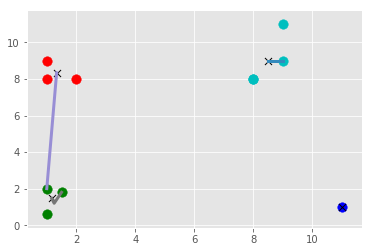

{0: array([1.16666667, 1.46666667]), 1: array([1.33333333, 8.33333333]), 2: array([8.5, 9. ]), 3: array([11.,  1.])}


In [17]:
clf = K_Means(k=4,tol=0.001,max_iter=300)
clf.fit(X)
for i in X:
    classification = clf.predict(i)
    color = colors[classification]
    plt.scatter(i[0],i[1],marker = "o",s=90,color = color)
for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0],clf.centroids[centroid][1],marker = "x" , color = "k",s=50,linewidth = 1)
plt.show()
print(clf.centroids)